In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import OneHotEncoder

In [ ]:
train=pd.read_csv('/content/binary_clf_data (1).csv')
train.head()

,gender,user_id,category_id,category_name,subcategory_id,subcategory_name,param1,param2,param3,param1_microcat_id,param2_microcat_id,param3_microcat_id
0,male,165823598,1,Для дома и дачи,50,Ремонт и строительство,Стройматериалы,NaN,NaN,981.0,NaN,NaN
1,male,165823598,1,Для дома и дачи,50,Ремонт и строительство,Стройматериалы,NaN,NaN,981.0,NaN,NaN
2,male,165823598,28,Личные вещи,22,"Одежда, обувь, аксессуары",Мужская одежда,Обувь,45,3285.0,6813.0,6074.0
3,male,165823598,1,Для дома и дачи,38,Мебель и интерьер,Шкафы и комоды,NaN,NaN,4533.0,NaN,NaN
4,male,154189396,1,Для дома и дачи,38,Мебель и интерьер,Кухонные гарнитуры,NaN,NaN,7506.0,NaN,NaN


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8923 entries, 0 to 8922
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              8923 non-null   object 
 1   user_id             8923 non-null   int64  
 2   category_id         8923 non-null   int64  
 3   category_name       8923 non-null   object 
 4   subcategory_id      8923 non-null   int64  
 5   subcategory_name    8923 non-null   object 
 6   param1              8570 non-null   object 
 7   param2              3395 non-null   object 
 8   param3              2119 non-null   object 
 9   param1_microcat_id  8570 non-null   float64
 10  param2_microcat_id  3395 non-null   float64
 11  param3_microcat_id  2119 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 836.7+ KB


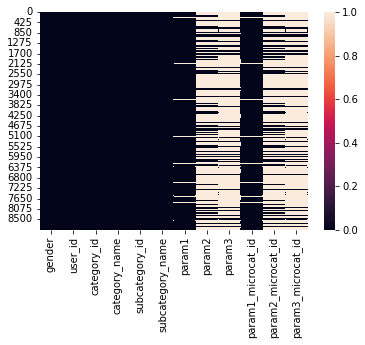

In [ ]:
sns.heatmap(train.isnull())

**Trying to fit without one-hot-encoding**

In [ ]:
#train = train.dropna()
train.param1 = train.param1.fillna("")
train.param2 = train.param2.fillna("")
train.param3 = train.param3.fillna("")
train = train.fillna(-100)
train = train.replace({'female': 1, 'male':0})
train.drop(['category_name', 'subcategory_name', 'param3_microcat_id', 'param1', 'param2', 'param3'], axis=1, inplace=True)
train.head()

,gender,user_id,category_id,subcategory_id,param1_microcat_id,param2_microcat_id
0,0,165823598,1,50,981.0,-100.0
1,0,165823598,1,50,981.0,-100.0
2,0,165823598,28,22,3285.0,6813.0
3,0,165823598,1,38,4533.0,-100.0
4,0,154189396,1,38,7506.0,-100.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('gender',axis=1), train['gender'], test_size=0.30, random_state=101)

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

In [ ]:
val_acc = accuracy_score(predictions, y_test)
print(val_acc)

0.5330593948449757


**Fitting with one-hot-encoding**

In [ ]:
train=pd.read_csv('/content/binary_clf_data (1).csv')
train.head()

train.param1 = train.param1.fillna("")
train.param2 = train.param2.fillna("")
train.param3 = train.param3.fillna("")
train = train.fillna(0)
train = train.replace({'female': 1, 'male':0})
train.drop(['param3_microcat_id', 'param1_microcat_id', 'param2_microcat_id', 'category_id', 'subcategory_id'], axis=1, inplace=True)

X_train, X_test = train_test_split(train, test_size=0.30, random_state=101)
#X_train, X_test, y_train, y_test = train_test_split(train.drop('gender',axis=1), train['gender'], test_size=0.30, random_state=101)

X_train_basic = X_train.drop(['param1', 'param2', 'param3','category_name', 'subcategory_name'], axis=1).values
X_test_basic = X_test.drop(['param1', 'param2', 'param3','category_name', 'subcategory_name'], axis=1).values
X_train

,gender,user_id,category_name,subcategory_name,param1,param2,param3
8619,0,154271800,Работа,Резюме,"Без опыта, студенты",,
1579,1,154204001,Для дома и дачи,Мебель и интерьер,Кухонные гарнитуры,,
3139,0,154212231,Хобби и отдых,Спорт и отдых,Другое,,
3925,0,154221896,Для дома и дачи,Ремонт и строительство,Стройматериалы,,
3532,1,154214711,Услуги,Предложение услуг,"Красота, здоровье",Другое,
...,...,...,...,...,...,...,...
599,1,154197747,Животные,Кошки,Шотландская,,
5695,1,154235937,Личные вещи,Товары для детей и игрушки,Автомобильные кресла,,
8006,0,154256853,Бытовая электроника,Телефоны,Xiaomi,,
1361,0,154202998,Животные,Кошки,Мейн-кун,,


In [ ]:
from sklearn.compose import make_column_transformer

transformer = make_column_transformer(
    (OneHotEncoder(), ['param1', 'param2', 'param3','category_name', 'subcategory_name']),
    remainder='passthrough')

transformed_training = transformer.fit_transform(train.drop(['gender']))

transformed = transformer.transform(X_train)
transformed_train = pd.DataFrame(
    data=transformed.todense(), 
    columns=transformer.get_feature_names())

transformed2 = transformer.transform(X_test)
transformed_test = pd.DataFrame(
    data=transformed2.todense(), 
    columns=transformer.get_feature_names())

transformed_test

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,onehotencoder__x0_,onehotencoder__x0_ASUS,onehotencoder__x0_BlackBerry,onehotencoder__x0_Fly,onehotencoder__x0_GPS-навигаторы,onehotencoder__x0_Highscreen,onehotencoder__x0_Huawei,"onehotencoder__x0_IT, интернет, телеком",onehotencoder__x0_LG,onehotencoder__x0_Lenovo,...,onehotencoder__x4_Собаки,onehotencoder__x4_Спорт и отдых,onehotencoder__x4_Телефоны,onehotencoder__x4_Товары для детей и игрушки,onehotencoder__x4_Товары для животных,onehotencoder__x4_Товары для компьютера,onehotencoder__x4_Фототехника,onehotencoder__x4_Часы и украшения,gender,user_id
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,154212924.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,154244260.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,154232513.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,154238979.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,154233384.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2672,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,154218985.0
2673,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,154212904.0
2674,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,154225211.0
2675,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,154190073.0


In [ ]:
import numpy as np
transformed_test_grouped = transformed_test.groupby('user_id').sum()
transformed_train_grouped = transformed_train.groupby('user_id').sum()

def true_gender(number):
  if number > 0:
    return 1
  else:
    return 0
  
transformed_test_grouped.gender = transformed_test_grouped.gender.apply(true_gender)
transformed_train_grouped.gender = transformed_train_grouped.gender.apply(true_gender)

y_train = transformed_train_grouped.gender
y_test = transformed_test_grouped.gender

transformed_test_grouped = transformed_test_grouped.drop(['gender'], axis=1)
transformed_train_grouped = transformed_train_grouped.drop(['gender'], axis=1)

transformed_test_grouped

,onehotencoder__x0_,onehotencoder__x0_ASUS,onehotencoder__x0_BlackBerry,onehotencoder__x0_Fly,onehotencoder__x0_GPS-навигаторы,onehotencoder__x0_Highscreen,onehotencoder__x0_Huawei,"onehotencoder__x0_IT, интернет, телеком",onehotencoder__x0_LG,onehotencoder__x0_Lenovo,...,onehotencoder__x4_Резюме,onehotencoder__x4_Ремонт и строительство,onehotencoder__x4_Собаки,onehotencoder__x4_Спорт и отдых,onehotencoder__x4_Телефоны,onehotencoder__x4_Товары для детей и игрушки,onehotencoder__x4_Товары для животных,onehotencoder__x4_Товары для компьютера,onehotencoder__x4_Фототехника,onehotencoder__x4_Часы и украшения
user_id,,,,,,,,,,,,,,,,,,,,,
154189658.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
154189774.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
154189816.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
154189841.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
154189857.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154273019.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
154273038.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
154273048.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
logmodel = LogisticRegression()
logmodel.fit(transformed_train_grouped,y_train)
predictions = logmodel.predict(transformed_test_grouped)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
#print(classification_report(y_test,predictions))
val_acc = accuracy_score(predictions, y_test)
print(val_acc)

0.7080808080808081


**Fitting the dataset**

In [ ]:
zadane=pd.read_csv('/content/dataset_527992_9 (3).txt')

zadane.param1 = zadane.param1.fillna("")
zadane.param2 = zadane.param2.fillna("")
zadane.param3 = zadane.param3.fillna("")
zadane = zadane.fillna(0)
zadane.drop(['param3_microcat_id', 'param1_microcat_id', 'param2_microcat_id', 'category_id', 'subcategory_id'], axis=1, inplace=True)
zadane.head()

,user_id,category_name,subcategory_name,param1,param2,param3
0,154189609,Хобби и отдых,Велосипеды,Детские,,
1,154189609,Бытовая электроника,Товары для компьютера,Комплектующие,Видеокарты,
2,154189609,Бытовая электроника,Телефоны,iPhone,,
3,154189609,Бытовая электроника,Телефоны,Xiaomi,,
4,154189728,Личные вещи,"Одежда, обувь, аксессуары",Женская одежда,Верхняя одежда,46–48 (L)


**Getting rid of features which weren't present in the training dataset**

In [ ]:
def true_replace_param1(x):
  bad = ['HTC', 'Далматин', 'Тягачи', 'Веб-камеры', 'Тайская', 'Надувные лодки', 'Киндер-сюрприз', 'Теннис, бадминтон, пинг-понг', 'Дайвинг и водный спорт', 'Мопеды и скутеры', 'Потолки', 'Пудель', 'С/х животные', 'Самоедская лайка', 'Alcatel', 'Explay', 'Спортивное питание', 'Фотографии, письма', 'Курцхаар', 'BQ'] 
  if x in bad:
    return ""
  else:
    return x

zadane.param1 = zadane.param1.apply(true_replace_param1)

def true_replace_param2(x):
  bad = ['Бухгалтерия, финансы', 'Ремонт ванной', 'Мелкая бытовая техника', 'Пошив и ремонт одежды', 'Док-станции', 'Телевизоры', '4', 'Мойка окон', 'Saab']
  if x in bad:
    return ""
  else:
    return x

zadane.param2 = zadane.param2.apply(true_replace_param2)

def true_replace_param3(x):
  bad = ['Accord', '9-5', 'Partner', 'Epica', 'Creta', 'Coupe', 'Elantra', '2104', 'CLS-класс', 'Соболь 2217', 'RAV4', 'QX50', 'HR-V', '200', 'GS', 'Соболь 2752', 'Matrix', 'Passat', '2105', '90']
  if x in bad:
    return ""
  else:
    return x

zadane.param3 = zadane.param3.apply(true_replace_param3)


def true_replace_category_subname(x):
  bad = ['Водный транспорт']
  if x in bad:
    return "Телефоны"
  else:
    return x

zadane.subcategory_name = zadane.subcategory_name.apply(true_replace_category_subname)

In [ ]:
from sklearn.compose import make_column_transformer

transformer = make_column_transformer(
    (OneHotEncoder(), ['param1', 'param2', 'param3','category_name', 'subcategory_name']),
    remainder='passthrough')

transformed_training = transformer.fit_transform(train.drop(['gender'], axis=1))

transformed = transformer.transform(zadane)
zadane_true = pd.DataFrame(
    data=transformed.todense(), 
    columns=transformer.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
zadane_true = zadane_true.groupby('user_id').sum()
zadane_true

,onehotencoder__x0_,onehotencoder__x0_ASUS,onehotencoder__x0_BlackBerry,onehotencoder__x0_Fly,onehotencoder__x0_GPS-навигаторы,onehotencoder__x0_Highscreen,onehotencoder__x0_Huawei,"onehotencoder__x0_IT, интернет, телеком",onehotencoder__x0_LG,onehotencoder__x0_Lenovo,...,onehotencoder__x4_Резюме,onehotencoder__x4_Ремонт и строительство,onehotencoder__x4_Собаки,onehotencoder__x4_Спорт и отдых,onehotencoder__x4_Телефоны,onehotencoder__x4_Товары для детей и игрушки,onehotencoder__x4_Товары для животных,onehotencoder__x4_Товары для компьютера,onehotencoder__x4_Фототехника,onehotencoder__x4_Часы и украшения
user_id,,,,,,,,,,,,,,,,,,,,,
154189609.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0
154189728.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
154189879.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
154189983.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
154190268.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154271834.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
154272200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
154272848.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
predictions = logmodel.predict(zadane_true)
predictions

array([0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,

In [ ]:
df = pd.DataFrame()
df["gender"] = predictions
df["user_id"] = zadane_true.index

In [ ]:
df.head()

,gender,user_id
0,0,154189609.0
1,1,154189728.0
2,1,154189879.0
3,1,154189983.0
4,0,154190268.0


In [ ]:
def get_gender(x):
  if x == 1:
    return 'female'
  else:
    return 'male'
  
df.gender = df.gender.apply(get_gender)
df.head()

,gender,user_id
0,male,154189609.0
1,female,154189728.0
2,female,154189879.0
3,female,154189983.0
4,male,154190268.0


In [ ]:
df.to_csv('test_predictions.csv', index=False)

In [ ]:
from google.colab import files
files.download('test_predictions.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

*Notes*

In [ ]:
train=pd.read_csv('/content/binary_clf_data (1).csv')
train.head()

train.param1 = train.param1.fillna("")
train.param2 = train.param2.fillna("")
train.param3 = train.param3.fillna("")
train = train.fillna(-100)
train = train.replace({'female': 1, 'male':0})
train.drop(['category_name', 'subcategory_name', 'param3_microcat_id'], axis=1, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(train.drop('gender',axis=1), train['gender'], test_size=0.30, random_state=101)

X_train_basic = X_train.drop(['param1', 'param2', 'param3'], axis=1).values
X_test_basic = X_test.drop(['param1', 'param2', 'param3'], axis=1).values
X_train

In [ ]:
param1_transformer = OneHotEncoder(sparse=False)
train_new_param = param1_transformer.fit_transform(train[['param1']])
train_param1 = param1_transformer.transform(X_train[['param1']])
test_param1 = param1_transformer.transform(X_test[['param1']])

param2_transformer = OneHotEncoder(sparse=False)
train_fit_param = param2_transformer.fit_transform(train[['param2']])
train_param2 = param2_transformer.fit_transform(X_train[['param2']])
test_param2 = param2_transformer.fit_transform(X_test[['param2']])

param3_transformer = OneHotEncoder(sparse=False)
train_fit_param = param3_transformer.fit_transform(train[['param3']])
train_param3 = param3_transformer.fit_transform(X_train[['param3']])
test_param3 = param3_transformer.fit_transform(X_test[['param3']])


#X_train.drop(['param1', 'param2', 'param3'], axis=1, inplace=True)
#X_test.drop(['param1', 'param2', 'param3'], axis=1, inplace=True)Ы

#X_train['param1'] = train_param1
#X_train['param2'] = train_param2
#X_train['param3'] = train_param3
X_train_extended = np.hstack([X_train_basic, train_param1, train_param2, train_param3])
X_test_extended = np.hstack([X_test_basic, test_param1, test_param2, test_param3])

print(X_train_extended)
X_train_extended

In [ ]:
Со всеми param 0.53
без 3 парам - 0.53